In [1]:
push!(LOAD_PATH,pwd())
using ProfileView
using constants
using types10
using Optim
using PyPlot
using data
include("DOSfunctions.jl")
include("userfunctions.jl")
include("propertyfuncs.jl")

kltSA (generic function with 1 method)

In [2]:
Eoff=5.0
Ts=collect(300.0:10.0:900.0)
######################################################################################
##for Liu x=0.6 best fit x=0.635 N=-1.45e20
######################################################################################
numofn=[-1.8e20]#,-1.22e18,-1.02e18,-0.94e18]#-9.5e19,-1.75e20,-3.0e19,-0.9e20]#Sample 1 -3.0e19, Sample 2 -1.25e20,
numofnn=[1e18]#,1e18,1e18,1e18]
#Sample 3 -1.75e20, Sample Sb 0.75% -1.03e20, #
xs=[0.6]#,0.8,0.7,0.61]#collect(0.0:0.01:1.0)
Es=collect(0.0:0.1:3.0)

var0=[Ts[1],xs[1]]

EX3(var)=Eoff#+Egx3(var[1],var[2])
EX1(var)=Ec0(var[2])+EX3(var)
ELH(var)=Eoff-Egx3(var[1],var[2])
EHH(var)=Eoff-Egx3(var[1],var[2])

effMassX1(var)=X1effMass(var[1])*me
effMassX3(var)=0.38*me
effMassLH(var)=-1.0*me
effMassHH(var)=-1.5*me

alphaX1(var)=0.0#EX1(var0)
alphaX3(var)=0.0#EX1(var0)
alphaLH(var)=0.0#EX3(var0)
alphaHH(var)=0.0#EX3(var0)

function Da(band::parBandTx,x::Float64)
    Da=7.0#9.0-1.5*x*x
    Dv=1.0
    if band==bandX3 ||  band==bandX1
        return Da
    end
    if band==bandHH ||  band==bandLH
        return Dv
    end
end

bandX3=parBandTx(true,1.0,effMassX3(var0),alphaX3(0.0),EX3(var0),[EX3],[effMassX3],[alphaX3],var0)
bandX1=parBandTx(true,1.0,effMassX1(var0),alphaX1(0.0),EX1(var0),[EX1],[effMassX1],[alphaX1],var0)
bandHH=parBandTx(true,1.0,effMassHH(var0),alphaHH(0.0),EHH(var0),[EHH],[effMassHH],[alphaHH],var0)
bandLH=parBandTx(true,1.0,effMassLH(var0),alphaLH(0.0),ELH(var0),[ELH],[effMassLH],[alphaLH],var0)
bndstTx=BandStrucTx([bandLH,bandHH,bandX1,bandX1,bandX1,bandX3,bandX3,bandX3],var0)#
#bndstTx=BandStrucTx([bandX3,bandX3,bandX3],var0)#

#vartau0=[bandC.effMass,Ts[1],Ec(var0),xs[1],Ec(var0),bandC,numofn[1]*1e6,bndstTx,numofnn[1]*1e6,bandV]
vartau0=[bandX3.effMass,Ts[1],EX1(var0),xs[1],EX1(var0),bandX3,numofn[1]*1e6,bndstTx,numofnn[1]*1e6,bandLH]
#var array: var[1]: effMass , var[2]:T, var[3]:E, var[4]:x, var[5]:Ef, 
#var[6]:band, var[7]:NII var[8]:bndst
#tauAC(var)=tauAC_func(Cl(var[4]),acPhDa(var[4]),var[2],var[1],var[3],var[6])
tauAC(var)=tauAC_func(Cl(var[4]),Da(var[6],var[4]),var[2],var[1],var[3],var[6])
tauPOP(var)=tauPOP_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1]
,var[3],tauPOPIIint(var[5],var[2],var[4],var[6]),var[7],opPhE(var[4]),var[8])
tauPOP2(var)=tauPOP2_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1],
var[3],opPhE(var[4]))
tauPOP3(var)=tauPOP3_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1],
var[3],opPhE(var[4]))
tauII2(var)=tauII2_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[7],var[1],var[3],var[8])
tauNI(var)=tauNI_func(epsilon0_x(var[4]),var[1],var[9])
tauTOTTx=tau_electron_B([tauAC,tauII2,tauNI,tauPOP2],vartau0)#,tauII2,tauPOP2,tauPOP3

xmax=3.0

3.0

In [3]:
Ec0(1.0)

-0.165

In [4]:
@time (Efs,sigmas,seebecks,kes,kees,kehs,kbis,sigmaes,sigmahs,seebeckes,seebeckhs)=electronicPropsiso(bndstTx,xs,Ts,numofn,numofnn,tauTOTTx,xmax)
x=3.0

 30.591650 seconds (162.22 M allocations: 41.203 GiB, 11.67% gc time)


3.0

In [5]:
foreach(x->println(x," ", kees[x,1,1]),1:length(sigmaes[:,:,1]))

1 1.4507356293842935
2 1.4483982810448166
3 1.446473517286758
4 1.44486629016154
5 1.4434851230467527
6 1.4422458890574106
7 1.4410738195459294
8 1.439904297429916
9 1.4386828474307882
10 1.4373646232172526
11 1.435913605129397
12 1.434301656890991
13 1.4325076709094697
14 1.4305162871050086
15 1.4283172272179456
16 1.4259044922787107
17 1.4232755820543963
18 1.4204308795004954
19 1.4173731192004386
20 1.4141069402990272
21 1.4106385168182447
22 1.4069752571708147
23 1.403125564673478
24 1.3990986512899815
25 1.3949043974080761
26 1.3905532511861107
27 1.386056162935482
28 1.3814245471223838
29 1.3766702701130535
30 1.3718056587587104
31 1.3668435267659649
32 1.3618306316331914
33 1.356740173915374
34 1.351593321636963
35 1.3464077216488675
36 1.341200319395953
37 1.3359885795363629
38 1.3307907905765277
39 1.3256262155502054
40 1.3205151971280986
41 1.315479242018064
42 1.3105410909148953
43 1.3057247746761522
44 1.3010556553340105
45 1.2965604496594914
46 1.2922672325814908
47 1.2882

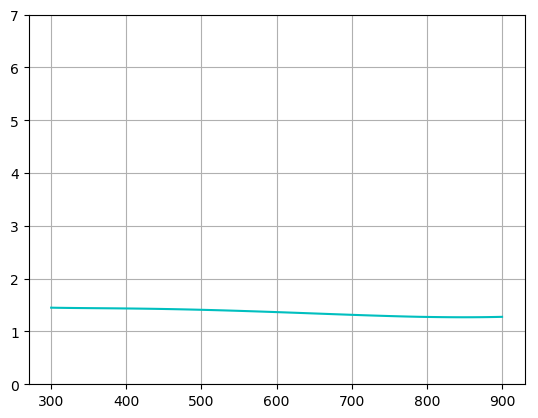

In [6]:
plot(Ts,kees[:,1,1],linestyle="-",color="c")
ylim(0,7)
grid()

In [7]:
foreach(x->println(x," ", kbis[x,1,1]),1:length(sigmaes[:,:,1]))

1 3.589468593129687e-8
2 8.673048131952806e-8
3 1.9720937149270956e-7
4 4.248139193080104e-7
5 8.718278326349601e-7
6 1.4627678853483775e-6
7 2.6132986608142988e-6
8 4.624074126706151e-6
9 8.001938855680724e-6
10 1.3514669461765603e-5
11 2.2283533381469942e-5
12 3.590693274781986e-5
13 5.661565333252879e-5
14 8.746339354456011e-5
15 0.00013255651446879223
16 0.00019732671822910835
17 0.00028885001306130193
18 0.00041621487973910056
19 0.0005914740787472559
20 0.0008435290633157319
21 0.0011913267323819907
22 0.0016644299672702969
23 0.0022999588142639284
24 0.003143460844635512
25 0.0042501400370702535
26 0.005686175123714641
27 0.007530103115656626
28 0.009874253355155906
29 0.012826217445398561
30 0.01553574616323666
31 0.019440152821662608
32 0.024282692288200042
33 0.030179600122200896
34 0.037291472974089024
35 0.04580449695119896
36 0.05592764177323141
37 0.06789239451264818
38 0.08195306453982994
39 0.09838716123006877
40 0.11749565452315051
41 0.13960301712403447
42 0.165056975

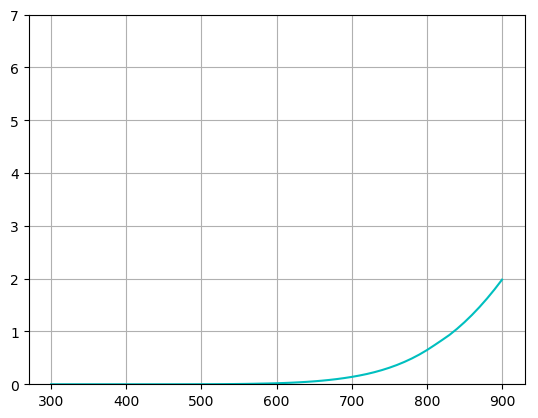

In [8]:
plot(Ts,kbis[:,1,1],linestyle="-",color="c")
ylim(0,7)
grid()

In [9]:
foreach(x->println(x," ", seebecks[x,1,1], "   es ",seebeckes[x,1,1],"   hs ",seebeckhs[x,1,1]),1:length(sigmaes[:,:,1]))

1 -0.00011563431514945868   es -0.00011563431544326606   hs 0.0020007487990934317
2 -0.00011826426427437054   es -0.00011826426499356028   hs 0.001928383451481063
3 -0.00012091284378871461   es -0.00012091284544580781   hs 0.0018619355417536629
4 -0.0001235731602605588   es -0.0001235731638786671   hs 0.0018004823090554908
5 -0.00012623889324960604   es -0.0001262389007777064   hs 0.0017433327734529063
6 -0.00012890434254664616   es -0.00012890435522515005   hs 0.0017085909977667274
7 -0.00013156443432082768   es -0.00013156445720365344   hs 0.0016651457035421421
8 -0.00013421471548665098   es -0.00013421475647049327   hs 0.0016212405904540293
9 -0.00013685132349563526   es -0.00013685139534272468   hs 0.0015786515837392136
10 -0.0001394709480519793   es -0.00013947107103436188   hs 0.0015377897682645463
11 -0.0001420707862493215   es -0.0001420709918214048   hs 0.0014987356987763167
12 -0.00014464849434522143   es -0.00014464883021787065   hs 0.001461456553688916
13 -0.000147202132648

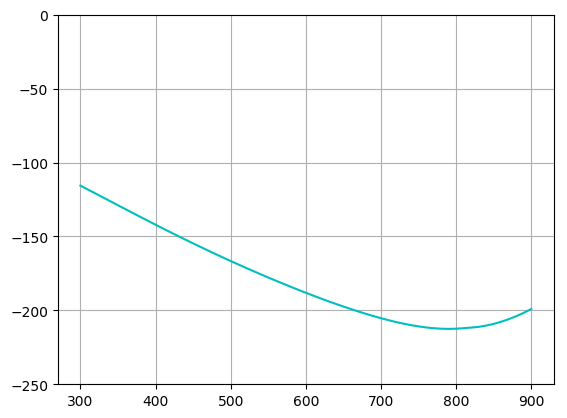

In [10]:
plot(Ts,seebecks[:,1,1]*1e6,linestyle="-",color="c")
ylim(-250,-0)
grid()

In [11]:
foreach(x->println(x," ", sigmas[x,1,1], "   es ",sigmaes[x,1,1],"   hs ",sigmahs[x,1,1]),1:length(sigmaes[:,:,1]))

1 192420.75847772646   es 192420.7584510136   hs 2.671285626447619e-5
2 190074.33740734044   es 190074.33734054852   hs 6.679191146604667e-5
3 187560.3900868584   es 187560.38993011165   hs 0.0001567467533744411
4 184920.7499930942   es 184920.74964535824   hs 0.0003477359734018754
5 182189.89888126086   es 182189.89814764692   hs 0.0007336139402926145
6 179396.14970631656   es 179396.14846850402   hs 0.001237812536080434
7 176562.66420778996   es 176562.66195909522   hs 0.002248694734751016
8 173708.31780429673   es 173708.3137488052   hs 0.004055491539677408
9 170848.430785574   es 170848.42363026   hs 0.007155314001527729
10 167995.3819254575   es 167995.36960747343   hs 0.012317984088145769
11 165159.12124212537   es 165159.1005498008   hs 0.020692324587913393
12 162347.59695770324   es 162347.56300718043   hs 0.0339505228176986
13 159567.1257964938   es 159567.07132286357   hs 0.05447363023802874
14 156822.6475245627   es 156822.56194002245   hs 0.08558454025027296
15 154117.99721

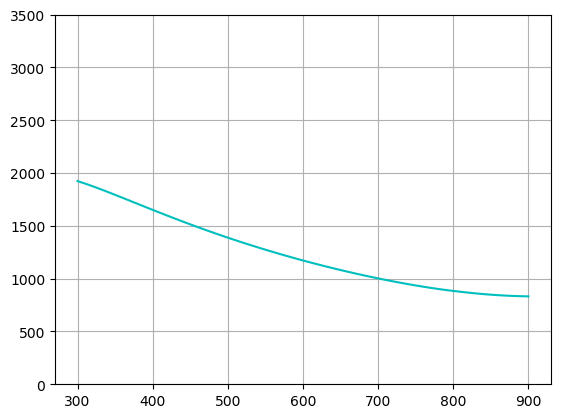

In [12]:
plot(Ts,sigmas[:,1,1]/100,linestyle="-",color="c")
ylim(0,3500)
grid()

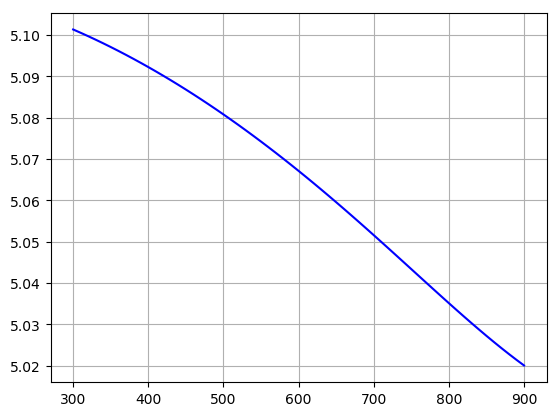

In [30]:
figure()
plot(Ts,Efs[:,1,1],linestyle="-",color="b")
grid()

In [14]:
T_EF_Dict=Dict()
for (Ti,Tx) in enumerate(Ts)
    T_EF_Dict[Tx]=(Efs[Ti])    
end
T_EF_Dict_Array=Array{Dict{Float64,Float64},2}(undef,length(numofn),length(xs))
Dict_temp=Dict()
Efsr=Array{Float64,3}(undef,length(Ts),length(numofn),length(xs))
for (j,jn) in enumerate(numofn)
    for (k,kx) in enumerate(xs) 
        for (i,iT) in enumerate(Ts)
            Efsr[i,j,k]=Efs[i,j,k]-EX3(0.0)
            Dict_temp[iT]=Efsr[i,j,k]
            T_EF_Dict_Array[j,k]=Dict_temp 
        end
    end
end
#foreach(i->println("$i= ",Ts[i]),1:length(Ts))
#Efsr

In [15]:
foreach(x->println(x," EX3 ", Efsr[x,1,1]," EX1 ", Efsr[x,1,1]-Ec0(0.6)),1:length(Efsr[:,:,1]))

1 EX3 0.10134895784017406 EX1 0.04034895784017403
2 EX3 0.10054956947570215 EX1 0.03954956947570212
3 EX3 0.09972549616317572 EX1 0.03872549616317569
4 EX3 0.09887684250289297 EX1 0.03787684250289294
5 EX3 0.098003716516466 EX1 0.03700371651646597
6 EX3 0.09710622924129542 EX1 0.03610622924129539
7 EX3 0.09618449441276233 EX1 0.03518449441276231
8 EX3 0.09523862822119078 EX1 0.03423862822119075
9 EX3 0.09426874913597949 EX1 0.033268749135979464
10 EX3 0.09327497779395344 EX1 0.03227497779395341
11 EX3 0.09225743695326294 EX1 0.03125743695326291
12 EX3 0.0912162515180599 EX1 0.030216251518059872
13 EX3 0.09015154864278419 EX1 0.02915154864278416
14 EX3 0.0890634579283125 EX1 0.02806345792831247
15 EX3 0.08795211172536632 EX1 0.026952111725366296
16 EX3 0.08681764556359539 EX1 0.025817645563595365
17 EX3 0.08566019872749653 EX1 0.024660198727496502
18 EX3 0.08447991500292584 EX1 0.023479915002925816
19 EX3 0.08327694362024829 EX1 0.022276943620248263
20 EX3 0.08205144042227897 EX1 0.0210

In [16]:
#println("-1")
#############Lattice Thermal Conductivity Parameters###############
con=1.0
thetaL=52.3e12*hbar/kB # K 
thetaT=29.7e12*hbar/kB  # K
vL=(1-con)*7700+con*4900    # m/s
vT=(1-con)*4900+con*3000    # m/s
gammaL=2.5*(1-con)+1.7*con
gammaT=2.5*(1-con)+1.7*con
M=(2*(24.305e-3)+(28.0855e-3*(1-con)+118.71e-3*con))/3/Nav
V=((1-con)*(6.39e-10)^3+con*(6.77e-10)^3)/12
a=V^(1.0/3.0)
ro=M/V
Vdj=(((6.39e-10)^3)/((1-con)*(6.39e-10)^3+con*(6.77e-10)^3))^(1/3)
jL=vL/7700*Vdj
jT=vT/4900*Vdj
thetaLx=thetaL*jL
thetaTx=thetaT*jT
##########Boundary Scattering###############3
D=11e-9
p=0.65
##########Alloy Scattering###################
mbar=(28.0855*(1-con)+118.71*con)
GammaSiSn=(1-con)*((28.0855-mbar)/mbar)^2+con*((118.71-mbar)/mbar)^2
GammaMgSiSn=2*((mbar/(24.305+mbar))^2*GammaSiSn);         
##########Electron Scattering###################
Eep=5.0*q
xsp=xs[1]
Tp=300.0
mdx1=0.67*me
mdx3=0.38*me
Efx3=0.2589
Efx1=0.2589
##########Nanoparticle Scattering###################
NP=0
#alpha=1.0
d=97.0e-9#
Vnp=4/3*pi*d^3
rhonp=NP/100/Vnp
rhoM=3.0
rhoT=3.78
alpha=1-exp(-1*(rhoT-rhoM)/rhoM);

#vartauPH0=[[0.02],Ts[1],gammaL,gammaT,xsp,thetaCLx,thetaCTx,thetaCTx,MSi,MGe,VSi,a,T_EF_Dict,0.0]
Tsindex=1#25
numberofnindex=1
xsindex=1
vartauPH0=[ [0.02],  Ts[1],   gammaL,  gammaT, con,#5
    thetaLx, thetaTx, thetaTx, M,   M, #10
    V, a, T_EF_Dict_Array, Eep, alpha, #15
    d, thetaLx, thetaTx, vL, vT, #20
    vL, vT, p, NP,Tsindex,#25
    numberofnindex,xsindex,p,D,GammaMgSiSn,#30
    mdx1,mdx3,Efx1,Efx3,ro,#35,
    NP,alpha,d,Vnp,rhonp #40
    ]
thetaCLx=thetaCL(vartauPH0[12],vartauPH0[5],vartauPH0[17],vartauPH0[19],vartauPH0[11])
thetaCTx=thetaCT(vartauPH0[12],vartauPH0[5],vartauPH0[18],vartauPH0[19],vartauPH0[11])
#println("2")
tauPHNLf(var)=tauPH_NL(var[3],var[11],var[1],var[2],var[9],var[21])
tauPHNTf(var)=tauPH_NT(var[4],var[11],var[1],var[2],var[9],var[22])                  


tauPHULf(var)=tauPH_U(var[3],var[1],var[2],var[9],var[19],var[17])
tauPHUTf(var)=tauPH_U(var[4],var[1],var[2],var[9],var[20],var[18])

tauPHALLLf(var)=tauPH_ALL(var[30],var[11],var[1],var[2],var[19])
tauPHALLTf(var)=tauPH_ALL(var[30],var[11],var[1],var[2],var[20])

tauPHeLfX3(var)=tauPH_e(var[14],mdx3,var[35],(var[13][var[26],var[27]])[var[2]],var[1],var[2],var[21])
tauPHeTfX3(var)=tauPH_e(var[14],mdx3,var[35],(var[13][var[26],var[27]])[var[2]],var[1],var[2],var[22])

tauPHeLfX1(var)=tauPH_e(var[14],X1effMass(var[2])*me,var[35],(var[13][var[26],var[27]])[var[2]]-Ec0(0.6)
    ,var[1],var[2],var[21])
tauPHeTfX1(var)=tauPH_e(var[14],X1effMass(var[2])*me,var[35],(var[13][var[26],var[27]])[var[2]]-Ec0(0.6)
    ,var[1],var[2],var[22])

tauPHBLf(var)=tauPH_B(var[19],var[28],var[29])
tauPHBTf(var)=tauPH_B(var[20],var[28],var[29])
#println("3")

tauPHNPLf(var)=tauPH_NP(var[37],var[40],var[38],var[1],var[2],var[19])
tauPHNPTf(var)=tauPH_NP(var[37],var[40],var[38],var[1],var[2],var[20])

tauPHTOTL=tau_phonon_B([tauPHNLf,tauPHULf,tauPHBLf,tauPHALLLf,tauPHeLfX3,tauPHeLfX1,tauPHNPLf],vartauPH0)#,tauPHALLLf,tauPHeLf,tauPH_eLf ,tauPHALLLf ,tauPHBLf,,tauPHULf
tauPHNL=tau_phonon_B([tauPHNLf],vartauPH0)
tauPHRL=tau_phonon_B([tauPHULf,tauPHBLf,tauPHALLLf,tauPHeLfX3,tauPHeLfX1,tauPHNPLf],vartauPH0) #,tauPHALLLf,tauPHeLf,tauPHALLLf,tauPH_eLf] ,tauPHBLf


tauPHTOTTx=tau_phonon_B([tauPHNTf,tauPHUTf,tauPHALLTf,tauPHeTfX3,tauPHeTfX1,tauPHBTf,tauPHNPTf],vartauPH0) #,tauPHALLTf,tauPHeTf,tauPHALLTf,tauPH_eTf ,tauPHBTf
tauPHNTx=tau_phonon_B([tauPHNTf],vartauPH0)
tauPHRTx=tau_phonon_B([tauPHUTf,tauPHALLTf,tauPHeTfX3,tauPHeTfX1,tauPHBTf,tauPHNPTf],vartauPH0) #,tauPHALLTf,tauPHeTf,tauPHALLTf,tauPH_eTf ,tauPHBTf
#

tauPHTOTTy=tau_phonon_B([tauPHNTf,tauPHUTf,tauPHBTf,tauPHALLTf,tauPHeTfX3,tauPHeTfX1,tauPHNPTf],vartauPH0) #,tauPHALLTf,tauPHeTf,tauPHALLTf,tauPH_eTf tauPHBTf
tauPHNTy=tau_phonon_B([tauPHNTf],vartauPH0)
tauPHRTy=tau_phonon_B([tauPHUTf,tauPHBTf,tauPHALLTf,tauPHeTfX3,tauPHeTfX1,tauPHNPTf],vartauPH0) #,tauPHALLTf,tauPH_eTf ,tauPHBTf,tauPHALLTf,tauPHeTf
#println("4")

tauPHL=[tauPHTOTL,tauPHNL,tauPHRL]
tauPHTx=[tauPHTOTTx,tauPHNTx,tauPHRTx]
tauPHTy=[tauPHTOTTx,tauPHNTx,tauPHRTx]
xmax=1.0

1.0

In [17]:
kls=Array{Float64}(undef,length(Ts),length(numofn),length(xs))
for (iT,iTx) in enumerate(Ts)
    
   (IL1,ITx1,IL2,ITx2,IL3,ITx3,kL,kTx,kTy,kls[iT,1,1])= klt(tauPHTOTL,tauPHNL,tauPHRL,tauPHTOTTx,tauPHNTx,tauPHRTx,tauPHTOTTy,tauPHNTy,tauPHRTy,iTx,[vL,vT,vT])
    println("T=", iTx, " kl= " ,round(kls[iT,1,1]*10000)/10000)
    println("IL1= ",IL1," IL2= ",IL2," IL3= ",IL3," ITx1= ",ITx1," ITx2= ",ITx2," ITx3= ",ITx3," kL/3=",kL,
    " kTx/3=",kTx," kTy/3=",kTy)
end

T=300.0 kl= 4.1808
IL1= 1.7815257615360096e-13 IL2= 0.1377530691827582 IL3= 2.4141853540482147e10 ITx1= 1.0850932962142185e-14 ITx2= 0.02596632863253833 ITx3= 4.8879132128042555e9 kL/3=2.779548085280553 kTx/3=0.7006141392202707 kTy/3=0.7006141392202707
T=310.0 kl= 4.0988
IL1= 1.4963098962007808e-13 IL2= 0.12666720525618938 IL3= 2.261279659598196e10 ITx1= 9.006699006366245e-15 ITx2= 0.023645188209265842 ITx3= 4.566081677254463e9 kL/3=2.732872542618203 kTx/3=0.6829420644489196 kTy/3=0.6829420644489196
T=320.0 kl= 4.0195
IL1= 1.2625416980454325e-13 IL2= 0.11668093225146457 IL3= 2.121175426527197e10 ITx1= 7.516726244519952e-15 ITx2= 0.0215890629388987 ITx3= 4.2742195410830626e9 kL/3=2.6873138895466546 kTx/3=0.6661045501516288 kTy/3=0.6661045501516288
T=330.0 kl= 3.943
IL1= 1.0699662926817345e-13 IL2= 0.10766944656419283 IL3= 1.9926262445265083e10 ITx1= 6.305570906121957e-15 ITx2= 0.0197616886293554 ITx3= 4.0088109987212358e9 kL/3=2.642880271496542 kTx/3=0.6500470842332585 kTy/3=0.650047084

T=630.0 kl= 2.4816
IL1= 2.855746072773624e-15 IL2= 0.017663833799341395 IL3= 5.032183829901885e9 ITx1= 1.4623356975539202e-16 ITx2= 0.002962665499797555 ITx3= 1.038321411374405e9 kL/3=1.7316012549806779 kTx/3=0.375003556387764 kTy/3=0.375003556387764
T=640.0 kl= 2.4509
IL1= 2.6078142473053424e-15 IL2= 0.01687300998268573 IL3= 4.863649183651396e9 ITx1= 1.332598797678569e-16 ITx2= 0.002827242339564555 ITx3= 1.0048491014122627e9 kL/3=1.7113911769461112 kTx/3=0.3697533519837859 kTy/3=0.3697533519837859
T=650.0 kl= 2.4209
IL1= 2.3845568134755145e-15 IL2= 0.01612825610807424 IL3= 4.703256656011461e9 ITx1= 1.2160743126419248e-16 ITx2= 0.0026999261464201118 ITx3= 9.729614624378943e8 kL/3=1.6916305646847756 kTx/3=0.36464692974945895 kTy/3=0.36464692974945895
T=660.0 kl= 2.3917
IL1= 2.1832147888821393e-15 IL2= 0.015426298917758964 IL3= 4.550501550966367e9 ITx1= 1.1112486831853214e-16 ITx2= 0.0025801209432938493 ITx3= 9.425606428760169e8 kL/3=1.6723052469460067 kTx/3=0.35967848296920485 kTy/3=0.3

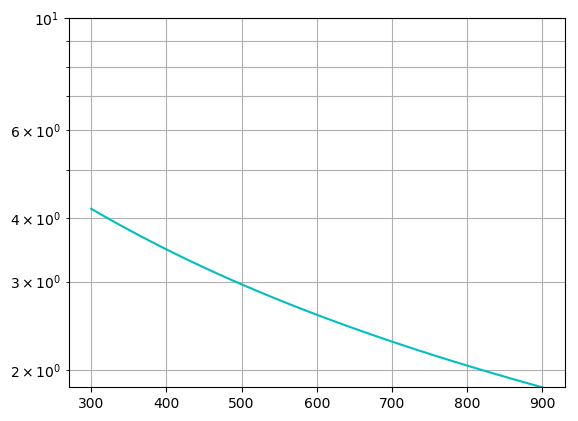

In [18]:
semilogy(Ts,kls[:,1,1],linestyle="-",color="c")
ylim(0,10)

grid(true,which="both")


In [19]:
tauPHL=[tauPHTOTL,tauPHNL,tauPHRL]
tauPHTx=[tauPHTOTTx,tauPHNTx,tauPHRTx]
tauPHTy=[tauPHTOTTx,tauPHNTx,tauPHRTx]

3-element Array{tau_phonon_B,1}:
 tau_phonon_B(Function[tauPHNTf, tauPHUTf, tauPHALLTf, tauPHeTfX3, tauPHeTfX1, tauPHBTf, tauPHNPTf], Any[[0.00010021, 0.000101108, 0.000102722, 0.000105055, 0.000108104, 0.000111872, 0.000116356, 0.000121558, 0.000127478, 0.000134115  …  0.145627, 0.145634, 0.14564, 0.145645, 0.145649, 0.145653, 0.145656, 0.145659, 0.14566, 0.145661], 900.0, 1.7, 1.7, 1.0, 239.945, 131.095, 131.095, 9.26138e-26, 9.26138e-26  …  6.10329e-31, 3.46157e-31, 0.2589, 0.2589, 3581.71, 0, 0.228948, 9.7e-8, 3.823e-21, 0.0])
 tau_phonon_B(Function[tauPHNTf], Any[[0.00010021, 0.000101108, 0.000102722, 0.000105055, 0.000108104, 0.000111872, 0.000116356, 0.000121558, 0.000127478, 0.000134115  …  0.145627, 0.145634, 0.14564, 0.145645, 0.145649, 0.145653, 0.145656, 0.145659, 0.14566, 0.145661], 900.0, 1.7, 1.7, 1.0, 239.945, 131.095, 131.095, 9.26138e-26, 9.26138e-26  …  6.10329e-31, 3.46157e-31, 0.2589, 0.2589, 3581.71, 0, 0.228948, 9.7e-8, 3.823e-21, 0.0])                           

In [20]:
klscomp=Array{Float64}(undef,length(Ts),length(numofn),length(xs))
klscomp=thermalPropsiso(Ts,tauPHL,tauPHTx,tauPHTy,[vL,vT,vT])

61×1×1 Array{Float64,3}:
[:, :, 1] =
 4.180776363721095 
 4.098756671516042 
 4.019522989849912 
 3.9429744399630593
 3.869008984079784 
 3.797524964329478 
 3.728422215148575 
 3.6616028533867193
 3.5969718249247262
 3.5344372675890825
 3.4739107358374977
 3.415307321876496 
 3.3585456996690497
 ⋮                 
 2.0660553418945518
 2.0445774637645324
 2.023530955108695 
 2.0029024657521397
 1.9826791415363691
 1.9628486035805908
 1.9433989291056344
 1.9243186336923663
 1.9055966548365078
 1.8872223366533516
 1.8691854155798586
 1.8514760069192715

In [21]:
xxsp=0.6
xsp=(100-xxsp)/100
Eep=7.0
etha=0.96
thetaD=350.0#524.0
#gammaSA,GM,Tts[Tti],MSiGecgs(xsp),thetaD,omegaD,beta,delta,Eep,mds,etha

Tt=thetaD
gammaSA=2.02
beta=2.0

eps=39
deltaSi=6.39e-10
deltaGe=6.77e-10
delta=deltaSi*(1-xsp)+deltaGe*xsp
deltacgs=delta*100
V=((1-xsp)*(6.39e-10)^3+xsp*(6.77e-10)^3)/12
MSiGecgs(xsp)=(2*(24.305)+(28.0855*(1-xsp)+118.71*xsp))/3
#G=1.033*(1-xsp)+1.017*xsp

a3=((1-xsp)*(6.39e-10)^3+xsp*(6.77e-10)^3)/12
a1=a3^(1/3)
#vtt=kB/hbar*(6*pi*pi)^(-1/3)*thetaD*delta
dd=(4.66e-26*(1-xsp)+1.206e-25*xsp)/(2e-29*(1-xsp)+2.2636e-29*xsp)

delMSiGe=(2*(24.305)+(28.0855*(1-xsp)-118.71*xsp))/3
deldelta=deltaSi-deltaGe
mbar=(28.0855*(1-xsp)+118.71*xsp)
GM=(1-xsp)*((28.0855-mbar)/mbar)^2+xsp*((118.71-mbar)/mbar)^2

omegaD=thetaD*kB/hbar
mds=0.5*me#0.427*me
#vt=5880.0

4.55469178e-31

In [22]:
function tauPH_U_SAT(gamma::Float64,intx::Array{Float64},T::Float64,M::Float64,
    theta::Float64,omegaD::Float64,beta::Float64,delta::Float64)
    #intx is different from x in oither phonon calculations intx=omega/omegaD
    Mcgs=M
    #println("Mcgs= ",Mcgs)
    deltacgs=delta*100
    #println("deltacgs= ",deltacgs)
    #println("1/Mcgs/deltacgs^2/(theta/T)= ",(1/Mcgs/deltacgs^2/(theta/T)))
    return 1 ./((3.264e-2)*((1+beta*(5/9))/(1+beta))*gamma^2 .*intx.^2 ./Mcgs/deltacgs^2/(theta/T))    
end

function tauPH_EP_SAT(Eep::Float64,md::Float64,x::Array{Float64},Ef::Float64,
    T::Float64,M::Float64,theta::Float64,delta::Float64)
    eta=Ef#Ef*q/kB/T
    deltacgs=delta*100
    Mcgs=M
    A=6.76e26(md/me)^2*deltacgs^2/Mcgs
    y=3.72e9(md/me)*deltacgs^2*theta
    D=1.68e-11/(md/me)/deltacgs^2/theta
    alphat=thetaD/T
    #println("alphat ",alphat)
    lambda=3
    ex1=1 .+exp.(-alphat*y+eta .-D*alphat*x .*x .+alphat .*x/2)
    ex2=1 .+exp.(-alphat*y+eta .-D*alphat*x .*x .-alphat .*x/2)    
    ext=ex1 ./ex2
    logt=log.(ext)
    return 1 ./(lambda*(A*Eep^2/alphat) .*logt) 
end

function tauPH_PD_SAT(GM::Float64,intx::Array{Float64},theta::Float64)
    return 1 ./(6.17e11*theta*GM .*intx .^4)
end


function I1(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)
    alphat=thetaD/Tt
    tauPH_U_SA_Af(x)=tauPH_U_SAT(gammaSA,x,Tt,MSiGecgs,thetaD,omegaD,beta,delta)
    #tauPH_N_SA_Af(x)=tauPH_U_SA_A(x)/(1+beta)
    tauPH_EP_SA_Af(x)=tauPH_EP_SAT(Eep,mds,x,etha,Tt,MSiGecgs,thetaD,delta)
    tauPH_PD_SA_Af(x)=tauPH_PD_SAT(GM,x,thetaD)
    tauPH_C_SA_Af(x)=1 ./((beta+1) ./tauPH_U_SA_Af(x)+1 ./tauPH_EP_SA_Af(x) .+1 ./tauPH_PD_SA_Af(x))
    
    integrand(x)=tauPH_C_SA_Af(x) .*(x .^4)*alphat^2 .*exp.(alphat*x) ./(exp.(alphat*x) .-1) .^2
    
    nodes, weights = qnwlege(1000,0.0,1.0)
    return a= do_quad(integrand,nodes, weights)    
end

function I2(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)
    alphat=thetaD/Tt
    tauPH_U_SA_Af(x)=tauPH_U_SAT(gammaSA,x,Tt,MSiGecgs,thetaD,omegaD,beta,delta)
    #tauPH_N_SA_Af(x)=tauPH_U_SA_A(x)/(1+beta)
    tauPH_EP_SA_Af(x)=tauPH_EP_SAT(Eep,mds,x,etha,Tt,MSiGecgs,thetaD,delta)
    tauPH_PD_SA_Af(x)=tauPH_PD_SAT(GM,x,thetaD)
    tauPH_C_SA_Af(x)=1 ./((beta+1)./tauPH_U_SA_Af(x)+1 ./tauPH_EP_SA_Af(x)+1 ./tauPH_PD_SA_Af(x))
    
    integrand(x)=beta*tauPH_C_SA_Af(x)./tauPH_U_SA_Af(x).*(x.^4)*alphat^2 .*exp.(alphat*x)./(exp.(alphat*x) .-1).^2
    
    nodes, weights = qnwlege(1000,0.0,1.0)
    return a= do_quad(integrand,nodes, weights)    
end

function I3(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)
    alphat=thetaD/Tt
    tauPH_U_SA_Af(x)=tauPH_U_SAT(gammaSA,x,Tt,MSiGecgs,thetaD,omegaD,beta,delta)
    #tauPH_N_SA_Af(x)=tauPH_U_SA_A(x)/(1+beta)
    tauPH_EP_SA_Af(x)=tauPH_EP_SAT(Eep,mds,x,etha,Tt,MSiGecgs,thetaD,delta)
    tauPH_PD_SA_Af(x)=tauPH_PD_SAT(GM,x,thetaD)
    tauPH_C_SA_Af(x)=1 ./((beta+1)./tauPH_U_SA_Af(x)+1 ./tauPH_EP_SA_Af(x)+1 ./tauPH_PD_SA_Af(x))
    
    integrand(x)=beta*1 ./tauPH_U_SA_Af(x).*
    (1 .-beta*tauPH_C_SA_Af(x) ./tauPH_U_SA_Af(x)).*(x.^4)*alphat^2 .*exp.(alphat*x)./(exp.(alphat*x) .-1).^2
    
    nodes, weights = qnwlege(1000,0.0,1.0)
    return a= do_quad(integrand,nodes, weights)    
end

function klt(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)    
    I1t=I1(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)
    I2t=I2(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)
    I3t=I3(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)
    return 4.67e-2*(thetaD^2/delta/100)*(I1t+I2t.^2/I3t)#(I1t+I2t.^2/I3t)#(kB*thetaD/hbar)^3*(I1t+I2t.^2/I3t)    #4.67e-2*(thetaD^2/delta/100)*(I1t+I2t.^2/I3t)    
end
klt_SA_A=Array{Float64,1}(undef,length(Ts))
for Tti in 1:length(Ts)
    klt_SA_A[Tti]=klt(gammaSA,GM,Ts[Tti],MSiGecgs(xsp),thetaD,omegaD,beta,delta,Eep,mds,
        Efsr[Tti,1,1]/kBe/Ts[Tti])
    #klt_V_A[Tti]=kltV(gammaSA,Tts[Tti],MSiGecgs(xsp),thetaD,omegaD,beta,delta,Eep,mds,etha,vtt,dd)*(thetaD/Ttt)^2    
end

In [23]:
MgSiSn4hKCT=[27.204980536447565,125.22263104569937,250.3986028902043, 300.61256865568174,350.4225990508186, 400.31661600810537,
450.60323681544304,500.88852450274595,550.37460672959,]
MgSiSn4hKCK=[ 2.8789473684210525, 2.7375, 2.609210526315789, 2.5121710526315786, 2.4184210526315786, 2.531907894736842, 2.614144736842105
, 2.6930921052631573, 2.7999999999999994]
MgSiSn2hKCT=[27.174994546327184, 125.66321921825845, 250.56521889830958, 300.8030294412153, 350.04276302458277,400.3366068836394, 
450.6409643790327, 500.95101524496823,550.7594666065552]
MgSiSn2hKCK=[2.608956937799043, 2.4846513157894736, 2.4523355263157893, 2.3861330409356722, 2.3131756578947367
, 2.385235380116959, 2.4832374999999995, 2.595288011695906, 2.697641746411483]
MgSiSn05hKCT=[26.1867119039,124.6184700145,249.7991072943,300.1809590466,349.8324946796,399.3641637338,450.1016014407,
450.7811561579,549.7232004091,500.4092678505]
MgSiSn05hKCK=[2.4217028509,2.3627326555,2.2459551435,2.1025076754,2.0223385167,2.2370652412,2.3803594498,2.302875,
2.5966549043,2.5105263158]
MgSiSn2h2TiO2KCT=[450.7811561579,26.5677491601,125.429931211,250.6172345758,300.4185996907,350.6278995361,
400.1639737642,500.3759398496,550.2639577668]
MgSiSn2h2TiO2KCK=[2.302875,2.3065789474,2.2490131579,2.1486842105,2.0335526316,1.925,2.1552631579,2.4282894737,
2.5269736842]
MgSiSn2h5TiO2KCT=[27.3549565403,124.5907321495,250.1753052845,299.9806697595,350.1926358449,400.1339785634,
450.0339945609,500.3299472084,550.6152348958]
MgSiSn2h5TiO2KCK=[2.2490131579,2.1782894737,2.0582236842,1.9529605263,1.8509868421,2.08125,2.2095394737,2.3148026316,
2.39375]
MgSiSn0hKCT=[26.9755694846,125.1437396683,250.3474884019,300.0735322348,349.8027683571,400.6191835973,449.916314723,
500.2366154749,550.052698235]
MgSiSn0hKCK=[2.1168755981,2.0268355263,1.9150855263,1.8140986842,1.7209888158,1.8544934211,1.9231644737,2.0605065789,
2.1816907895]

9-element Array{Float64,1}:
 2.1168755981
 2.0268355263
 1.9150855263
 1.8140986842
 1.7209888158
 1.8544934211
 1.9231644737
 2.0605065789
 2.1816907895

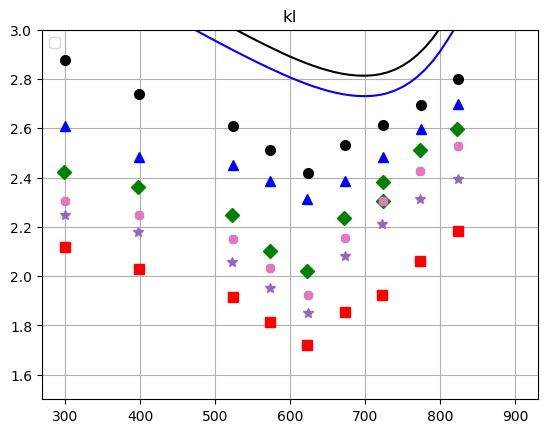

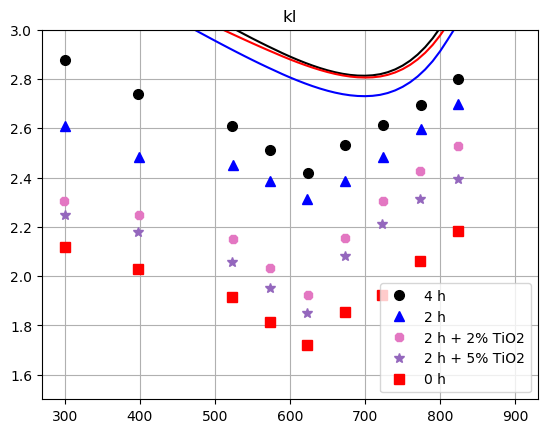

/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:3291: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '
No handles with labels found to put in legend.


In [24]:
figure()
title("kl")
plot(Ts,36*klt_SA_A .+kes[:,1,1] .+0.6*kbis[:,1,1],Linestyle="-",color="k")
plot(Ts,34*klt_SA_A .+kes[:,1,1]+0.567 .*kbis[:,1,1],Linestyle="-",color="b")
plot(Ts,28*klt_SA_A .+1.48kes[:,1,1] .+0.57*kbis[:,1,1],Linestyle="-",color="g")
plot(Ts,29*klt_SA_A .+1.5kes[:,1,1] .+0.53*kbis[:,1,1],Linestyle="-.",color="tab:pink")
plot(Ts,27*klt_SA_A .+1.5kes[:,1,1] .+0.53*kbis[:,1,1],Linestyle="-.",color="tab:purple")
plot(Ts,26*klt_SA_A /+1.3kes[:,1,1] .+0.52*kbis[:,1,1],Linestyle="-",color="r")
plot(MgSiSn4hKCT .+273,MgSiSn4hKCK,linestyle="None",marker="o",markersize=7,color="k")
plot(MgSiSn2hKCT .+273,MgSiSn2hKCK,linestyle="None",marker="^",markersize=7,color="b")
plot(MgSiSn05hKCT .+273,MgSiSn05hKCK,linestyle="None",marker="D",markersize=7,color="g")
plot(MgSiSn2h2TiO2KCT  .+273,MgSiSn2h2TiO2KCK,linestyle="None",marker="8",markersize=7,color="tab:pink")
plot(MgSiSn2h5TiO2KCT .+273,MgSiSn2h5TiO2KCK,linestyle="None",marker="*",markersize=7,color="tab:purple")
plot(MgSiSn0hKCT .+273,MgSiSn0hKCK,linestyle="None",marker="s",markersize=7,color="r")
#plot(SiGe_SA_162_Bulk_KC_T,SiGe_SA_162_Bulk_KC_KL,linestyle="None",marker="o",markersize=7,color="b")
#plot(SiGe_SA_162_Bulk_KC_T2,SiGe_SA_162_Bulk_KC_K2,linestyle="None",marker="o",markersize=7,color="g")
legend(loc="upper left")
ylim(1.5,3.0)
grid()


figure()
title("kl")
plot(Ts,36 .*klt_SA_A .+kes[:,1,1] .+0.6 .*kbis[:,1,1],Linestyle="-",color="k",label="")
plot(Ts,34 .*klt_SA_A .+kes[:,1,1] .+0.567 .*kbis[:,1,1],Linestyle="-",color="b")
#plot(Ts,28*klt_SA_A+1.48kes[:,1,1]+0.57*kbis[:,1,1],Linestyle="-",color="g")
plot(Ts,29 .*klt_SA_A .+1.5kes[:,1,1] .+0.53 .*kbis[:,1,1],Linestyle="-.",color="tab:pink")
plot(Ts,27 .*klt_SA_A .+1.5kes[:,1,1] .+0.53 .*kbis[:,1,1],Linestyle="-.",color="tab:purple")
plot(Ts,26 .*klt_SA_A .+1.3kes[:,1,1] .+0.52 .*kbis[:,1,1],Linestyle="-",color="r")
plot(MgSiSn4hKCT .+273,MgSiSn4hKCK,linestyle="None",marker="o",markersize=7,color="k",label="4 h")
plot(MgSiSn2hKCT .+273,MgSiSn2hKCK,linestyle="None",marker="^",markersize=7,color="b",label="2 h")
#plot(MgSiSn05hKCT+273,MgSiSn05hKCK,linestyle="None",marker="D",markersize=7,color="g")
plot(MgSiSn2h2TiO2KCT .+273,MgSiSn2h2TiO2KCK,linestyle="None",marker="8",markersize=7,color="tab:pink",label="2 h + 2% TiO2")
plot(MgSiSn2h5TiO2KCT .+273,MgSiSn2h5TiO2KCK,linestyle="None",marker="*",markersize=7,color="tab:purple",label="2 h + 5% TiO2")
plot(MgSiSn0hKCT .+273,MgSiSn0hKCK,linestyle="None",marker="s",markersize=7,color="r",label="0 h")
#plot(SiGe_SA_162_Bulk_KC_T,SiGe_SA_162_Bulk_KC_KL,linestyle="None",marker="o",markersize=7,color="b")
#plot(SiGe_SA_162_Bulk_KC_T2,SiGe_SA_162_Bulk_KC_K2,linestyle="None",marker="o",markersize=7,color="g")

ylim(1.5,3.0)
legend(loc="lower right")
grid()


In [25]:
MgSiSn4hECE=[10,12.4,20.5,35.8,43.2,69.6,82.8,100,110]
MgSiSn2hECE=[3,4.4,8.5,15.8,22.2,55.6,50.8,68,80]
MgSiSn1hECE=[2,4.2,3.7,11.8,22.2,25.6,30.8,48,64]
MgSiSn0hECE=[1.6,1.7,3.8,7.8,12.2,25.6,40.8,68,62]

9-element Array{Float64,1}:
  1.6
  1.7
  3.8
  7.8
 12.2
 25.6
 40.8
 68.0
 62.0

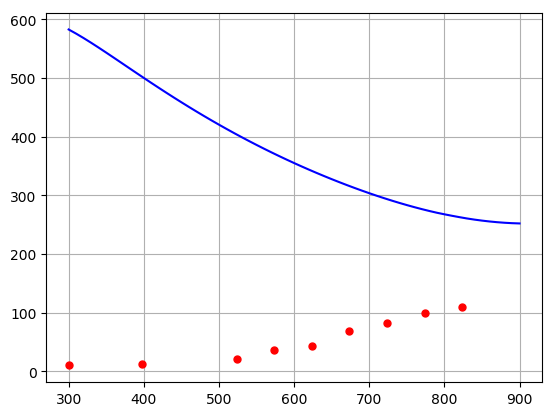

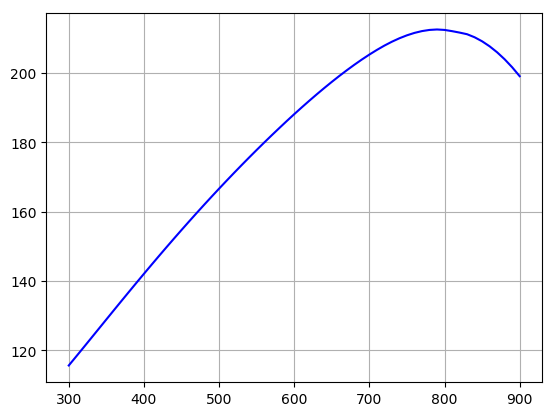

In [26]:

figure()
plot(Ts,sigmas[:,1,1]/100/6^(2/3),linestyle="-",color="b")
#plot(Ts,sigmas[:,2,2]/100/6^(2/3),linestyle="-",color="r")
#plot(Ts,sigmas[:,3,3]/100/6^(2/3),linestyle="-",color="k")
#plot(Ts,sigmas[:,4,4]/100/6^(2/3),linestyle="-",color="g")
plot(MgSiSn4hKCT .+273,MgSiSn4hECE,linestyle="None",marker=".",markersize=10,color="r")
#plot(MgSiSn4hKCT .+273,MgSiSn2hECE,linestyle="None",marker=".",markersize=10,color="k")
#plot(MgSiSn4hKCT .+273,MgSiSn1hECE,linestyle="None",marker=".",markersize=10,color="b")
#plot(MgSiSn4hKCT .+273,MgSiSn0hECE,linestyle="None",marker=".",markersize=10,color="g")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Green_EC_E/100,linestyle="None",marker="x",markersize=2,color="g")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Blue_EC_E/100,linestyle="None",marker="o",markersize=2,color="b")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Pink_EC_E/100,linestyle="None",marker="o",markersize=2,color="r")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Black_EC_E/100,linestyle="None",marker="o",markersize=2,color="k")
grid()

figure()
plot(Ts,-seebecks[:,1,1]*1e6,linestyle="-",color="b")
#plot(Ts,-seebecks[:,2,2]*1e6,linestyle="-",color="r")
#plot(Ts,-seebecks[:,3,3]*1e6,linestyle="-",color="k")
#plot(Ts,-seebecks[:,4,4]*1e6,linestyle="-",color="g")
#plot(Ts,-seebecks[:,2,2]*1e6,linestyle="-",color="b")
#plot(SiGe_Vin_162_Bulk_SC_T,SiGe_Vin_162_Bulk_SC_S,linestyle="None",marker=".",markersize=10,color="r")
#plot(SiGe_Suin_EC_T,-SiGe_Suin_Green_SC_S,linestyle="None",marker="x",markersize=2,color="g")
#plot(SiGe_Suin_EC_T,-SiGe_Suin_Blue_SC_S,linestyle="None",marker="x",markersize=2,color="b")
#plot(SiGe_Suin_EC_T,-SiGe_Suin_Pink_SC_S,linestyle="None",marker="x",markersize=2,color="r")
#plot(SiGe_Suin_EC_T,-SiGe_Suin_Black_SC_S,linestyle="None",marker="x",markersize=2,color="k")
grid()